In [411]:
from bs4 import BeautifulSoup
import requests

keyword = '데이터 분석가'

URL = 'https://www.saramin.co.kr/zf_user/search/recruit?searchType=search&company_cd=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C9%2C10&keydownAccess=&searchword={}&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y&recruitPage=6&recruitSort=relation&recruitPageCount=40&inner_com_type=&show_applied=&quick_apply=&except_read=&ai_head_hunting=&mainSearch=n'.format(keyword) 
response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
#print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

In [412]:
# 페이징 처리
job_list = []

page = 1

while True:
    URL = 'https://www.saramin.co.kr/zf_user/search/recruit?searchType=search&company_cd=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C9%2C10&keydownAccess=&searchword={}&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y&recruitPage={}&recruitSort=relation&recruitPageCount=40&inner_com_type=&show_applied=&quick_apply=&except_read=&ai_head_hunting=&mainSearch=n'.format(keyword, page) 
    response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
    #response.status_code
  
    #print(URL)

    soup = BeautifulSoup(response.text, 'html.parser')

    no_result = soup.select('.info_no_result')

    #print('현재 페이지' + str(page))

    if len(no_result) > 0:

        #print('페이지 끝' + str(page))

        break

    else:
        div_tags = soup.select('#recruit_info .item_recruit')

        for div_tag in div_tags:   
            
            job_info = {}   
            
            # print(div_tag.select_one('.area_job .job_tit').text.strip())

            job_info['회사명'] = div_tag.select_one('.area_corp .track_event').text.strip()
            job_info['채용공고'] = div_tag.select_one('.area_job .job_tit').text.strip()
            job_info['경력'] = div_tag.select('.job_condition > span')[1].text.strip()
            job_info['지원자격'] = div_tag.select('.job_condition > span')[2].text.strip()
            #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
            job_info['지역'] = div_tag.select('.job_condition > span')[0].text.strip()
            job_info['플랫폼'] = '사람인'

            print(job_info)

            job_list.append(job_info)
    
    page += 1


{'회사명': '(주)에이아이더뉴트리진', '채용공고': 'AI, 머신러닝 데이터분석가 등 신입 및 경력 채용', '경력': '신입·경력', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '사람인'}
{'회사명': '바탕에비뉴(주)', '채용공고': 'JAVA 개발자/빅데이터 분석가 채용', '경력': '경력', '지원자격': '대졸↑', '지역': '서울 금천구', '플랫폼': '사람인'}
{'회사명': '(주)인터엑스', '채용공고': '데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)', '경력': '신입·경력', '지원자격': '학력무관', '지역': '서울전체', '플랫폼': '사람인'}
{'회사명': '인텔렉추얼데이터(주)', '채용공고': 'eDiscovery Project Manager(데이터 분석가) 인턴 채용', '경력': '경력무관', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '사람인'}
{'회사명': '한국축산데이터(주)', '채용공고': 'R&D 연구 직군 모집 (비임상수의사/데이터분석가) (신입/경력)', '경력': '신입·경력', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '사람인'}
{'회사명': '(주)와이리', '채용공고': "2030 여행 플랫폼 '와이리'에서 데이터분석가를 모집합니다 :)", '경력': '경력무관', '지원자격': '학력무관', '지역': '서울 중구', '플랫폼': '사람인'}
{'회사명': '(주)패스트뷰', '채용공고': '[제품개발그룹] 데이터 분석가 (Data Analyst)', '경력': '경력 1~4년', '지원자격': '학력무관', '지역': '서울 강남구', '플랫폼': '사람인'}
{'회사명': '콘센트릭스서비스코리아(유)', '채용공고': '데이터 분석가 채용', '경력': '경력 5~15년', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '사람인'}
{'회사명': '㈜네오

In [413]:
# 페이징 처리
page = 1

while True:
    URL = 'https://www.jobkorea.co.kr/Search/?stext={}&tabType=recruit&Page_No={}'.format(keyword, page) 
    response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
    #print(response.status_code)
  
    #print(URL)

    soup = BeautifulSoup(response.text, 'html.parser')

    no_result = soup.select('.list-default .list-post')

    #print('현재 페이지' + str(page))

    if len(no_result) < 1:

        #print('페이지 끝' + str(page))

        break

    else:
        div_tags = soup.select('.list-default .list-post')

        for div_tag in div_tags:   
            
            job_info = {}   

            job_info['회사명'] = div_tag.select_one('.post-list-corp .name').text.strip() 
            job_info['채용공고'] = div_tag.select_one('.post-list-info .title').text.strip()
            job_info['경력'] = div_tag.select('.option > span')[0].text.strip()    
            job_info['지원자격'] = div_tag.select('.option > span')[1].text.strip()    
            #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
            job_info['지역'] = div_tag.select_one('.option .long').text.strip()
            job_info['플랫폼'] = '잡코리아'

            print(job_info)

            job_list.append(job_info)
    
    page += 1

{'회사명': '(주)마이셀럽스', '채용공고': '[마이셀럽스] 데이터 분석가 정규직 채용', '경력': '경력2년↑', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜네오플', '채용공고': '[네오플] 게임 서비스 운영 데이터 분석가 모집', '경력': '경력무관', '지원자격': '학력무관', '지역': '제주 제주시', '플랫폼': '잡코리아'}
{'회사명': '펜타시스템테크놀러지㈜', '채용공고': 'Blue Analytics 데이터 분석가 채용 공고', '경력': '경력무관', '지원자격': '대졸↑', '지역': '서울 영등포구', '플랫폼': '잡코리아'}
{'회사명': 'Spoqa', '채용공고': '(주)스포카 데이터 분석가 채용 (팀장)', '경력': '경력7년↑', '지원자격': '학력무관', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜쿡앱스', '채용공고': '[쿡앱스] 게임 데이터 분석가 모집', '경력': '경력3년↑', '지원자격': '학력무관', '지역': '경기 성남시', '플랫폼': '잡코리아'}
{'회사명': '㈜더아이엠씨 [TheIMC]', '채용공고': '2023년 상반기 정기채용-상주 스마트팜 연구소 데이터 분석가(신입/경력)', '경력': '신입·경력2년↑', '지원자격': '대졸↑', '지역': '경북 상주시 외', '플랫폼': '잡코리아'}
{'회사명': '푸드노트서비스', '채용공고': '데이터 분석가 채용 (경력 2년 이상)', '경력': '경력2년↑', '지원자격': '학력무관', '지역': '서울 영등포구', '플랫폼': '잡코리아'}
{'회사명': '㈜엔데이터', '채용공고': '데이터분석가(컨설턴트) 신입/경력 모집', '경력': '신입·경력', '지원자격': '대졸↑', '지역': '서울 강남구 외', '플랫폼': '잡코리아'}
{'회사명': '㈜켄즈', '채용공고': '[신입/경력] (AI/ML활용) 데이터 분석가 

In [414]:

from selenium import webdriver
from bs4 import BeautifulSoup
import time

URL = 'https://www.wanted.co.kr/search?query={}'.format(keyword) 
# Chrome 브라우저를 자동으로 실행
driver = webdriver.Chrome("chromedriver.exe")

# 해당 URL에 접속
driver.get(URL)

# 브라우저에서 페이지가 로드되는 동안 대기
time.sleep(5)

SCROLL_PAUSE_SEC = 1

# 스크롤 높이 가져옴
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # 끝까지 스크롤 다운
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 1초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# BeautifulSoup을 사용하여 HTML 코드 파싱
soup = BeautifulSoup(driver.page_source, "html.parser")

# 채용 공고 정보 추출
div_tags = soup.select('.List_List_container__JnQMS .Card_className__u5rsb')

for div_tag in div_tags:  
    
    job_info['회사명'] = div_tag.select('.body > div')[1].text.strip()
    job_info['채용공고'] = div_tag.select('.body > div')[0].text.strip()
    job_info['경력'] = ""    
    job_info['지원자격'] = "" 
    #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
    job_info['지역'] = div_tag.select_one('.body .job-card-company-location').text.strip().split('.')[0]
    job_info['플랫폼'] = '원티드'

    print(job_info)

    job_list.append(job_info)    

# 브라우저 종료
driver.quit()


{'회사명': '', '채용공고': '', '경력': '', '지원자격': '', '지역': '', '플랫폼': '원티드'}
{'회사명': '', '채용공고': '', '경력': '', '지원자격': '', '지역': '', '플랫폼': '원티드'}
{'회사명': '', '채용공고': '', '경력': '', '지원자격': '', '지역': '', '플랫폼': '원티드'}
{'회사명': '', '채용공고': '', '경력': '', '지원자격': '', '지역': '', '플랫폼': '원티드'}


In [415]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline


In [416]:
# 리스트를 DataFrame으로 변환
df = pd.DataFrame(job_list, columns=['회사명', '채용공고','경력','지원자격','지역','플랫폼'])

print(df.head(5))

            회사명                                       채용공고     경력  지원자격  \
0  (주)에이아이더뉴트리진               AI, 머신러닝 데이터분석가 등 신입 및 경력 채용  신입·경력   대졸↑   
1      바탕에비뉴(주)                       JAVA 개발자/빅데이터 분석가 채용     경력   대졸↑   
2       (주)인터엑스    데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)  신입·경력  학력무관   
3   인텔렉추얼데이터(주)  eDiscovery Project Manager(데이터 분석가) 인턴 채용   경력무관   대졸↑   
4    한국축산데이터(주)       R&D 연구 직군 모집 (비임상수의사/데이터분석가) (신입/경력)  신입·경력   대졸↑   

       지역  플랫폼  
0  서울 강남구  사람인  
1  서울 금천구  사람인  
2    서울전체  사람인  
3  서울 강남구  사람인  
4  서울 강남구  사람인  


In [417]:
print(df.info(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     1301 non-null   object
 1   채용공고    1301 non-null   object
 2   경력      1301 non-null   object
 3   지원자격    1301 non-null   object
 4   지역      1301 non-null   object
 5   플랫폼     1301 non-null   object
dtypes: object(6)
memory usage: 61.1+ KB
None 회사명     0
채용공고    0
경력      0
지원자격    0
지역      0
플랫폼     0
dtype: int64


<Axes: xlabel='플랫폼'>

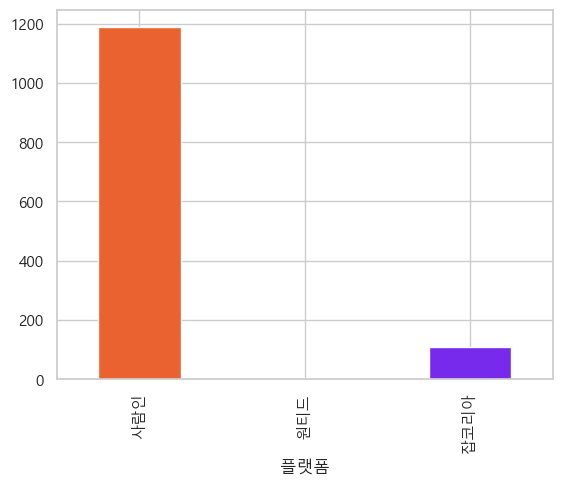

In [418]:
import numpy as np

col = np.random.rand(len(df.groupby('플랫폼')['채용공고']),3)  ## 색상 지정
 
df.groupby('플랫폼')['채용공고'].count().plot(kind='bar',color=col)


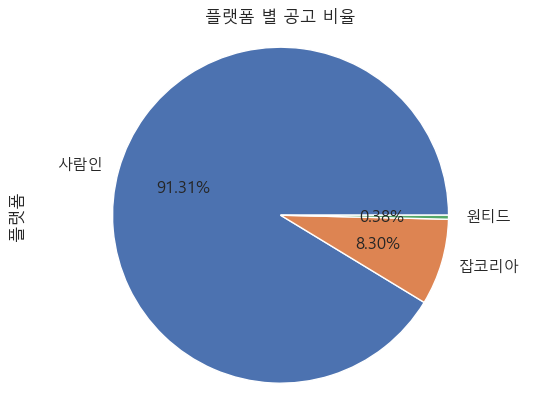

In [419]:
df3 = df.플랫폼.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("플랫폼 별 공고 비율")
plt.axis('equal')
plt.show()

In [420]:
df.groupby('지역').count()


,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
,5,5,5,5,5
강원 원주시,1,1,1,1,1
강원 춘천시,1,1,1,1,1
경기 고양시,1,1,1,1,1
경기 고양시 덕양구,3,3,3,3,3
...,...,...,...,...,...
충북 청주시 상당구,1,1,1,1,1
충북 청주시 서원구,2,2,2,2,2
충북 청주시 청원구,1,1,1,1,1


In [421]:
contains_seoul = df['지역'].str.contains('서울')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
subset_df = df[contains_seoul]

subset_df

,회사명,채용공고,경력,지원자격,지역,플랫폼
0,(주)에이아이더뉴트리진,"AI, 머신러닝 데이터분석가 등 신입 및 경력 채용",신입·경력,대졸↑,서울 강남구,사람인
1,바탕에비뉴(주),JAVA 개발자/빅데이터 분석가 채용,경력,대졸↑,서울 금천구,사람인
2,(주)인터엑스,"데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)",신입·경력,학력무관,서울전체,사람인
3,인텔렉추얼데이터(주),eDiscovery Project Manager(데이터 분석가) 인턴 채용,경력무관,대졸↑,서울 강남구,사람인
4,한국축산데이터(주),R&D 연구 직군 모집 (비임상수의사/데이터분석가) (신입/경력),신입·경력,대졸↑,서울 강남구,사람인
...,...,...,...,...,...,...
1284,대기업,대기업 빅데이터분석 과차장급,경력7년↑,대졸↑,서울 마포구 외,잡코리아
1285,중소기업(300명이하),[올룰로/킥고잉]Product Owner(앱서비스),경력5년↑,대졸↑,서울 강남구,잡코리아
1286,대기업,데이터사이언스 팀장/(10-15년) - 식품 대기업(급),경력10년↑,대졸↑,서울 마포구 외,잡코리아
1287,111퍼센트㈜,[111퍼센트]데이터 분석가 모집\r\n\t\t\t\t\t\t\t\t\t게임잡,경력5년↑,학력무관,서울 강남구,잡코리아


In [422]:
subset_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
서울 강남구,286,286,286,286,286
서울 강남구 외,5,5,5,5,5
서울 강서구,18,18,18,18,18
서울 관악구,2,2,2,2,2
서울 광진구,1,1,1,1,1
서울 구로구,13,13,13,13,13
서울 구로구 외,1,1,1,1,1
서울 금천구,32,32,32,32,32
서울 동대문구,4,4,4,4,4


In [423]:
contains_seoul = df['지역'].str.contains('강원')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
subset_df = df[contains_seoul]

subset_df

subset_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
강원 원주시,1,1,1,1,1
강원 춘천시,1,1,1,1,1


In [424]:
# 데이터 전처리 진행 전 dataframe 백업해놓고 진행
copy_df = df.copy()

In [425]:
type(copy_df['지역'])

pandas.core.series.Series

In [426]:
#df.loc[df['지역'].str.contains('서울'), '서울']

In [427]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '서울' if '서울' in x else x)

In [428]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '강원' if '강원' in x else x)

In [429]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '경기' if '경기' in x else x)

In [430]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '충북' if '충북' in x else x)

In [431]:
copy_df['지역'] = copy_df['지역'].apply(lambda x: '경남' if '경남' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '경북' if '경북' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '충남' if '충남' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '대구' if '대구' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '광주' if '광주' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '제주' if '제주' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '부산' if '부산' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '대전' if '대전' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '전남' if '전남' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '전북' if '전북' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '세종' if '세종' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '인천' if '인천' in x else x)
copy_df['지역'] = copy_df['지역'].apply(lambda x: '울산' if '울산' in x else x)

In [432]:
copy_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
,5,5,5,5,5
강원,2,2,2,2,2
경기,244,244,244,244,244
경남,9,9,9,9,9
경북,10,10,10,10,10
광주,4,4,4,4,4
대구,22,22,22,22,22
대전,47,47,47,47,47
부산,10,10,10,10,10


In [433]:
america = copy_df[copy_df['지역'].str.contains('미국')].index
japan = copy_df[copy_df['지역'].str.contains('일본')].index
asia = copy_df[copy_df['지역'].str.contains('아시아')].index
europe = copy_df[copy_df['지역'].str.contains('유럽')].index
mexico = copy_df[copy_df['지역'].str.contains('멕시코')].index
copy_df.drop(america, inplace=True)
copy_df.drop(japan, inplace=True)
copy_df.drop(asia, inplace=True)
copy_df.drop(europe, inplace=True)
copy_df.drop(mexico, inplace=True)

In [434]:
copy_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
,5,5,5,5,5
강원,2,2,2,2,2
경기,244,244,244,244,244
경남,9,9,9,9,9
경북,10,10,10,10,10
광주,4,4,4,4,4
대구,22,22,22,22,22
대전,47,47,47,47,47
부산,10,10,10,10,10


<Axes: ylabel='지역'>

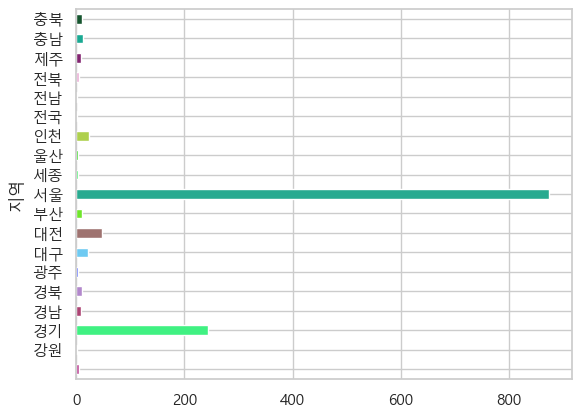

In [435]:
col = np.random.rand(len(copy_df.groupby('지역')['채용공고']),3)  ## 색상 지정


copy_df.groupby('지역')['채용공고'].count().plot(kind='barh',color=col)

In [436]:
copy_df.groupby('지역').groups.keys()

dict_keys(['', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전국', '전남', '전북', '제주', '충남', '충북'])

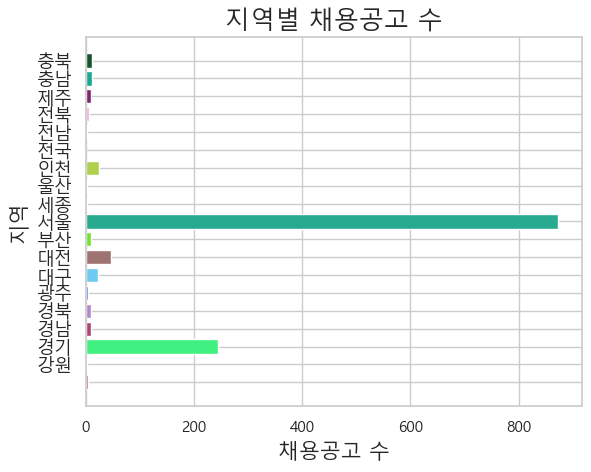

In [437]:
import numpy as np

y = np.arange(len(copy_df.groupby('지역')))
region = copy_df.groupby('지역').groups.keys()
values = copy_df.groupby('지역')['채용공고'].count()

plt.barh(y, values,color=col)

plt.title('지역별 채용공고 수', fontsize=18)

plt.ylabel('지역', fontsize=15)

plt.xlabel('채용공고 수', fontsize=15)

plt.yticks(y, region, fontsize=13, rotation=0)

plt.show()

In [438]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [439]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [440]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my_app')

main_location = geolocator.geocode('서울')
print(main_location.latitude, main_location.longitude)

37.5666791 126.9782914


In [441]:
contains_seoul = df['지역'].str.contains('서울')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
seoul_df = df[contains_seoul]

seoul_df = seoul_df.loc[:,['회사명','지역']]

seoul_df.head(5)

,회사명,지역
0,(주)에이아이더뉴트리진,서울 강남구
1,바탕에비뉴(주),서울 금천구
2,(주)인터엑스,서울전체
3,인텔렉추얼데이터(주),서울 강남구
4,한국축산데이터(주),서울 강남구


In [442]:
seoul_df.groupby('지역').count()

,회사명
지역,
서울 강남구,286
서울 강남구 외,5
서울 강서구,18
서울 관악구,2
서울 광진구,1
서울 구로구,13
서울 구로구 외,1
서울 금천구,32
서울 동대문구,4


In [443]:
seoul_out = seoul_df[seoul_df['지역'].str.contains('외')].index
seoul_all = seoul_df[seoul_df['지역'].str.contains('전체')].index
seoul = seoul_df[seoul_df['지역'] == '서울'].index
seoul_all2 = seoul_df[seoul_df['지역'].str.contains('전지역')].index
seoul_df.drop(seoul_out, inplace=True)
seoul_df.drop(seoul_all, inplace=True)
seoul_df.drop(seoul_all2, inplace=True)
seoul_df.drop(seoul, inplace=True)

In [444]:
seoul_df.groupby('지역').count()

,회사명
지역,
서울 강남구,286
서울 강서구,18
서울 관악구,2
서울 광진구,1
서울 구로구,13
서울 금천구,32
서울 동대문구,4
서울 동작구,3
서울 마포구,32


In [445]:
# 중복제거
seoul_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [446]:
seoul_df['lat'] = ''
seoul_df['long'] = ''

In [447]:
seoul_df.head(5)

,회사명,지역,lat,long
0,(주)에이아이더뉴트리진,서울 강남구,,
1,바탕에비뉴(주),서울 금천구,,
3,인텔렉추얼데이터(주),서울 강남구,,
4,한국축산데이터(주),서울 강남구,,
5,(주)와이리,서울 중구,,


In [448]:
for idx, row in seoul_df.iterrows():
    #print("행 인덱스: ", idx)    
    #print("지역 ", seoul_df.loc[idx,'지역'])    
    location = geolocator.geocode(seoul_df.loc[idx,'지역'])
    seoul_df.loc[idx,'lat'] = location.latitude
    seoul_df.loc[idx,'long'] = location.longitude  

    #print(seoul_df.loc[idx,'지역'], seoul_df.loc[idx,'lat'], seoul_df.loc[idx,'long'])

    # if idx == 12:
    #     break


In [ ]:
seoul_df.head(5)

,회사명,지역,lat,long
0,(주)에이아이더뉴트리진,서울 강남구,37.5177,127.0473
1,바탕에비뉴(주),서울 금천구,37.4565,126.8954
3,인텔렉추얼데이터(주),서울 강남구,37.5177,127.0473
4,한국축산데이터(주),서울 강남구,37.5177,127.0473
5,(주)와이리,서울 중구,37.556072,126.97236


In [ ]:
import folium

map = folium.Map(location=[main_location.latitude, main_location.longitude], zoom_start=12)

for idx, row in seoul_df.iterrows():    
    folium.Marker(location=[seoul_df.loc[idx,'lat'], seoul_df.loc[idx,'long']], popup=seoul_df.loc[idx,'회사명'],
                icon=folium.Icon(color='red')).add_to(map)
map

In [ ]:
contains_gyeonggi = df['지역'].str.contains('경기')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
gyeonggi_df = df[contains_gyeonggi]

gyeonggi_df = gyeonggi_df.loc[:,['회사명','지역']]

gyeonggi_df

,회사명,지역
11,(주)인실리코젠,경기 용인시 기흥구
23,(주)브릭,경기 성남시 분당구
34,(주)쿡앱스,경기 성남시 분당구
40,(주)디구루,경기 성남시 분당구
45,(주)메디에이지,경기 성남시 수정구
...,...,...
1286,㈜쿡앱스(CookApps),경기 성남시
1287,넥슨,경기 성남시
1290,넥슨,경기 성남시
1291,넥슨,경기 성남시


In [ ]:
gyeonggi_df.groupby('지역').count()

,회사명
지역,
경기 고양시,1
경기 고양시 덕양구,3
경기 고양시 일산동구,6
경기 고양시 일산서구,2
경기 과천시,1
경기 광명시,3
경기 광주시,2
경기 구리시,1
경기 군포시,1


In [ ]:
gyeonggi_out = gyeonggi_df[gyeonggi_df['지역'].str.contains('외')].index
gyeonggi_all = gyeonggi_df[gyeonggi_df['지역'].str.contains('전체')].index
gyeonggi_df.drop(gyeonggi_out, inplace=True)
gyeonggi_df.drop(gyeonggi_all, inplace=True)

In [ ]:
gyeonggi_df.groupby('지역').count()

,회사명
지역,
경기 고양시,1
경기 고양시 덕양구,3
경기 고양시 일산동구,6
경기 고양시 일산서구,2
경기 과천시,1
경기 광명시,3
경기 광주시,2
경기 구리시,1
경기 군포시,1


In [ ]:
# 중복제거
gyeonggi_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

gyeonggi_df['lat'] = ''
gyeonggi_df['long'] = ''

for idx, row in gyeonggi_df.iterrows():
    #print("행 인덱스: ", idx)    
    #print("지역 ", gyeonggi_df.loc[idx,'지역'])    
    location = geolocator.geocode(gyeonggi_df.loc[idx,'지역'])
    gyeonggi_df.loc[idx,'lat'] = location.latitude
    gyeonggi_df.loc[idx,'long'] = location.longitude  

    #print(seoul_df.loc[idx,'지역'], seoul_df.loc[idx,'lat'], seoul_df.loc[idx,'long'])

    # if idx == 12:
    #     break


In [ ]:
gyeonggi_df.head(5)

,회사명,지역,lat,long
11,(주)인실리코젠,경기 용인시 기흥구,37.2801,127.1148
23,(주)브릭,경기 성남시 분당구,37.3826,127.1188
34,(주)쿡앱스,경기 성남시 분당구,37.3826,127.1188
40,(주)디구루,경기 성남시 분당구,37.3826,127.1188
45,(주)메디에이지,경기 성남시 수정구,37.450339,127.146293


In [ ]:
main_location = geolocator.geocode('경기도')
print(main_location.latitude, main_location.longitude)

37.2752 127.0095


In [ ]:

map = folium.Map(location=[main_location.latitude, main_location.longitude], zoom_start=10)

for idx, row in gyeonggi_df.iterrows():    
    folium.Marker(location=[gyeonggi_df.loc[idx,'lat'], gyeonggi_df.loc[idx,'long']], popup=gyeonggi_df.loc[idx,'회사명'],
                icon=folium.Icon(color='red')).add_to(map)
map

In [ ]:
%pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install sshtunnel

Note: you may need to restart the kernel to use updated packages.


In [ ]:
df.head(5)

,회사명,채용공고,경력,지원자격,지역,플랫폼
0,(주)에이아이더뉴트리진,"AI, 머신러닝 데이터분석가 등 신입 및 경력 채용",신입·경력,대졸↑,서울 강남구,사람인
1,바탕에비뉴(주),JAVA 개발자/빅데이터 분석가 채용,경력,대졸↑,서울 금천구,사람인
2,(주)인터엑스,"데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)",신입·경력,학력무관,서울전체,사람인
3,인텔렉추얼데이터(주),eDiscovery Project Manager(데이터 분석가) 인턴 채용,경력무관,대졸↑,서울 강남구,사람인
4,한국축산데이터(주),R&D 연구 직군 모집 (비임상수의사/데이터분석가) (신입/경력),신입·경력,대졸↑,서울 강남구,사람인


In [ ]:
df.groupby('지원자격').count()

,회사명,채용공고,경력,지역,플랫폼
지원자격,,,,,
,25,25,25,25,25
고졸↑,52,52,52,52,52
대졸,4,4,4,4,4
대졸↑,504,504,504,504,504
박사,13,13,13,13,13
석사,1,1,1,1,1
석사↑,97,97,97,97,97
초대졸↑,178,178,178,178,178
학력무관,444,444,444,444,444


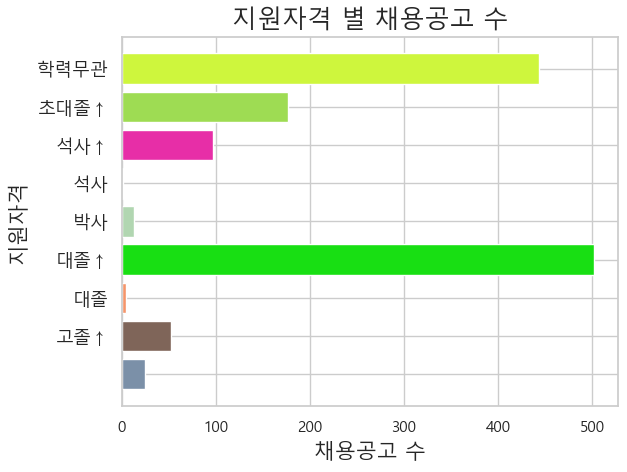

In [ ]:
import numpy as np

y = np.arange(len(copy_df.groupby('지원자격')))
region = copy_df.groupby('지원자격').groups.keys()
values = copy_df.groupby('지원자격')['채용공고'].count()

col = np.random.rand(len(values),3)  ## 색상 지정

plt.barh(y, values,color=col)

plt.title('지원자격 별 채용공고 수', fontsize=18)

plt.ylabel('지원자격', fontsize=15)

plt.xlabel('채용공고 수', fontsize=15)

plt.yticks(y, region, fontsize=13, rotation=0)

plt.show()